# Converting a RAW file to a standard image format

In this notebook we read and process a RAW image and save it in a standard image format. The [sample image](https://www.rawsamples.ch/raws/nikon/d3x/RAW_NIKON_D3X.NEF) used here can be found on [rawsamples.ch](https://www.rawsamples.ch).

## Imports
For displaying images in this notebook we first import [matplotlib](http://matplotlib.org/).

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 5, 10
from matplotlib.pyplot import imshow

The actual conversion is done with [rawpy](https://pypi.python.org/pypi/rawpy) and [Pillow](http://python-pillow.org/) which are imported below.

In [2]:
import rawpy
import PIL

## Opening the RAW image

Opening a RAW image is as simple as calling [`rawpy.imread`](http://pythonhosted.org/rawpy/api/index.html#rawpy.imread).

In [3]:
raw = rawpy.imread('../images/RAW_NIKON_D3X.NEF')

Note that [`imread()`](http://pythonhosted.org/rawpy/api/index.html#rawpy.imread) behaves similar to Python's built-in [`open()`](https://docs.python.org/3.5/library/functions.html#open) function, meaning that the opened file has to be closed again later on.

## Processing the RAW image

When processing RAW images we have to decide how to handle the white balance.
A common option is to just use the white balance values that are stored in the RAW image when the picture was shot.
To do that, the [`use_camera_wb`](http://pythonhosted.org/rawpy/api/rawpy.Params.html) parameter has to be set to `True`.

In [4]:
rgb = raw.postprocess(use_camera_wb=True)

The return value of [`postprocess()`](http://pythonhosted.org/rawpy/api/rawpy.RawPy.html#rawpy.RawPy.postprocess) is a [numpy](http://www.numpy.org/) array which we can display with matplotlib's [`imshow()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) function.

In [5]:
print(rgb.dtype, rgb.shape)

uint8 (6080, 4044, 3)


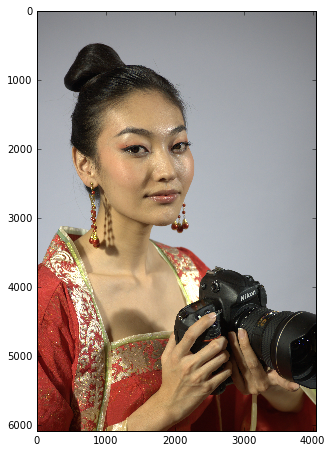

In [6]:
imshow(rgb)

If the camera white balance does not look right, then it can also be estimated from the image itself with the [`use_auto_wb`](http://pythonhosted.org/rawpy/api/rawpy.Params.html) parameter.

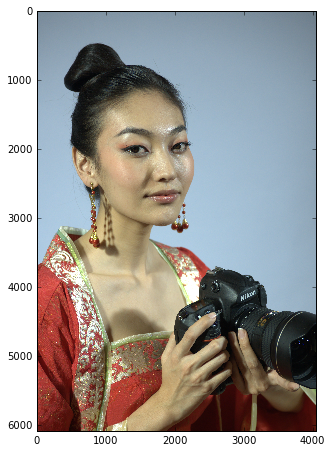

In [7]:
rgb2 = raw.postprocess(use_auto_wb=True)
imshow(rgb2)

In this example the white balance values stored from the camera look more natural, so we will use the first version.

## Saving the processed image

Saving the processed image (a numpy array) in a standard format is easily done with Pillow.

In [8]:
PIL.Image.fromarray(rgb).save('image.jpg', quality=90, optimize=True)

In [9]:
PIL.Image.fromarray(rgb).save('image.tiff')

## Closing the RAW image

It is important to close the RAW image again after we are done with processing.

In [10]:
raw.close()

### Using context managers

rawpy also supports [context managers](https://en.wikibooks.org/wiki/Python_Programming/Context_Managers) for opening/closing RAW images. In that case, the conversion code would look like below.

In [11]:
with rawpy.imread('../images/RAW_NIKON_D3X.NEF') as raw:
    rgb = raw.postprocess(use_camera_wb=True)
PIL.Image.fromarray(rgb).save('image.jpg')